In [79]:
import numpy as np
import pandas as pd

In [80]:
df = pd.read_csv('online_retail_II.csv', encoding='unicode_escape')
print(df.shape)
df.head()


(1067371, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [81]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='str')

In [82]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)

df.columns


Index(['invoice', 'stockcode', 'description', 'quantity', 'invoicedate',
       'price', 'customer_id', 'country'],
      dtype='str')

In [83]:

df = df[~df['invoice'].astype(str).str.startswith('C')]

df = df[(df['quantity'] > 0) & (df['price'] > 0)]


In [84]:
df.shape

(1041670, 8)

In [85]:
df.isnull().sum()

invoice             0
stockcode           0
description         0
quantity            0
invoicedate         0
price               0
customer_id    236121
country             0
dtype: int64

In [86]:
df['invoice'].unique().shape

(40077,)

In [87]:
df['customer_id'].unique().shape

(5879,)

In [88]:
basket_size = df.groupby('invoice')['stockcode'].nunique()

basket_size[basket_size <= 20].shape


(25186,)

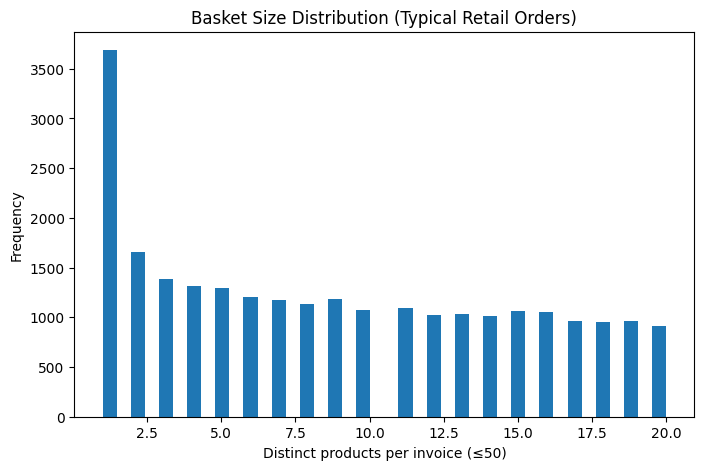

In [89]:
plt.figure(figsize=(8,5))
plt.hist(basket_size[basket_size <= 20], bins=40)
plt.xlabel("Distinct products per invoice (≤50)")
plt.ylabel("Frequency")
plt.title("Basket Size Distribution (Typical Retail Orders)")
plt.show()


In [90]:
df['basket_size'] = df.groupby('invoice')['stockcode'].transform('nunique')
df['basket_type'] = pd.cut(
    df['basket_size'],
    bins=[0, 5, 20, 1000],
    labels=['small_retail', 'medium_retail', 'bulk_wholesale']
)
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,basket_size,basket_type
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,8,medium_retail
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,8,medium_retail
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,8,medium_retail
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,8,medium_retail
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,8,medium_retail


In [91]:
temp=df

In [92]:
temp['invoice_value'] = temp['quantity'] * temp['price']


In [93]:
product_stats = (
    temp.groupby('description')
        .agg(
            total_qty=('quantity', 'sum'),
            total_revenue=('invoice_value', 'sum'),
            invoice_count=('invoice', 'nunique')
        )
        .sort_values('total_revenue', ascending=False)
)


In [94]:
product_stats.head(10)


,total_qty,total_revenue,invoice_count
description,,,
REGENCY CAKESTAND 3 TIER,27577,344563.25,3918
Manual,10055,340731.33,788
DOTCOM POSTAGE,1436,322657.48,1415
WHITE HANGING HEART T-LIGHT HOLDER,96683,266923.55,5455
"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60,1
JUMBO BAG RED RETROSPOT,79279,150935.56,3269
PARTY BUNTING,28378,149187.05,2674
ASSORTED COLOUR BIRD ORNAMENT,81809,132187.92,2807
POSTAGE,5461,127597.42,1851


In [95]:
product_stats.tail(10)


,total_qty,total_revenue,invoice_count
description,,,
HOLLYHOCK SQUARE HANDY TIN,1,1.250,1
WHITE SCANDINAVIAN HEART CHRISTMAS,1,1.250,1
SET 36 COLOURING PENCILS DOILEY,1,1.250,1
CAT WITH SUNGLASSES BLANK CARD,5,0.950,1
OWLS CHARLOTTE BAG,1,0.850,1
CAT W SUNGLASSES BLANK CARD,4,0.760,1
SET 12 COLOURING PENCILS DOILEY,1,0.650,1
PINK HEART CHRISTMAS DECORATION,1,0.380,1
HAPPY BIRTHDAY GINGER CAT CARD,2,0.380,1


In [96]:
product_stats['avg_price'] = (
    product_stats['total_revenue'] / product_stats['total_qty']
)


In [97]:
product_stats['product_type'] = pd.qcut(
    product_stats['invoice_count'],
    q=3,
    labels=['niche', 'regular', 'frequent']
)


In [98]:
product_stats.head()

,total_qty,total_revenue,invoice_count,avg_price,product_type
description,,,,,
REGENCY CAKESTAND 3 TIER,27577,344563.25,3918,12.494588,frequent
Manual,10055,340731.33,788,33.886756,frequent
DOTCOM POSTAGE,1436,322657.48,1415,224.691838,frequent
WHITE HANGING HEART T-LIGHT HOLDER,96683,266923.55,5455,2.760812,frequent
"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60,1,2.080000,niche


In [99]:
product_stats.columns

Index(['total_qty', 'total_revenue', 'invoice_count', 'avg_price',
       'product_type'],
      dtype='str')

In [100]:
product_stats = product_stats.reset_index()
product_stats.columns
product_stats.head()

,description,total_qty,total_revenue,invoice_count,avg_price,product_type
0,REGENCY CAKESTAND 3 TIER,27577,344563.25,3918,12.494588,frequent
1,Manual,10055,340731.33,788,33.886756,frequent
2,DOTCOM POSTAGE,1436,322657.48,1415,224.691838,frequent
3,WHITE HANGING HEART T-LIGHT HOLDER,96683,266923.55,5455,2.760812,frequent
4,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60,1,2.080000,niche


In [101]:
df = df.merge(
    product_stats[['description', 'product_type']],  # only needed columns
    on='description',  # join on description
    how='left'         # keep all rows from df even if no match
)

In [102]:
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,basket_size,basket_type,invoice_value,product_type
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,8,medium_retail,83.4,frequent
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,8,medium_retail,81.0,frequent
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,8,medium_retail,81.0,frequent
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,8,medium_retail,100.8,frequent
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,8,medium_retail,30.0,frequent


In [103]:
df['product_type'].value_counts()

product_type
frequent    864247
regular     154025
niche        23398
Name: count, dtype: int64

In [104]:
df.to_csv("preprocessed.csv", index=False)
